In [1]:
pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-8cu4calj
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-8cu4calj
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -q git+https://github.com/huggingface/transformers.git


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install -q monai

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install patchify

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
import os
from patchify import patchify
import random
from scipy import ndimage

In [7]:
os.getcwd()

'/home/student/Documents/Arpit_sir/SOLAR/CodeFiles/dhruv_git/Solar_Rooftop_Detection/Solar_Rooftop_Detection'

In [10]:
os.chdir("../")
os.getcwd()

'/home/student/Documents/Arpit_sir/SOLAR/CodeFiles/dhruv_git/Solar_Rooftop_Detection'

In [14]:
target_images = os.getcwd() + "/Arial_images_1024_1024/images"
target_masks = os.getcwd() + "/Arial_images_1024_1024/masks"
target_images

'/home/student/Documents/Arpit_sir/SOLAR/CodeFiles/dhruv_git/Solar_Rooftop_Detection/Arial_images_1024_1024/images'

In [15]:
target_masks 

'/home/student/Documents/Arpit_sir/SOLAR/CodeFiles/dhruv_git/Solar_Rooftop_Detection/Arial_images_1024_1024/masks'

In [16]:
os.listdir(target_images)[0]

'0.jpg'

In [22]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 5.8 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
import cv2

In [24]:
images = []

for i in range(len(os.listdir(target_images))):
    img_path = target_images+"/"+os.listdir(target_images)[i]
    img = cv2.imread(img_path)
    images.append(img)
images

[array([[[124, 128, 122],
         [122, 126, 120],
         [124, 125, 121],
         ...,
         [ 64,  66,  66],
         [ 68,  73,  72],
         [ 97, 102, 101]],
 
        [[122, 126, 120],
         [131, 135, 129],
         [124, 125, 121],
         ...,
         [ 55,  57,  57],
         [ 80,  85,  84],
         [ 80,  85,  84]],
 
        [[126, 130, 125],
         [121, 125, 120],
         [123, 127, 122],
         ...,
         [ 96,  98,  98],
         [ 79,  81,  81],
         [ 60,  62,  62]],
 
        ...,
 
        [[ 45,  50,  49],
         [ 81,  86,  85],
         [ 97,  99,  99],
         ...,
         [115, 118, 103],
         [104, 107,  92],
         [105, 108,  93]],
 
        [[ 25,  28,  26],
         [134, 137, 135],
         [128, 131, 129],
         ...,
         [ 95,  98,  83],
         [108, 113,  98],
         [109, 114,  99]],
 
        [[ 40,  43,  41],
         [110, 113, 111],
         [123, 126, 124],
         ...,
         [118, 121, 106],
  

In [25]:
import matplotlib.pyplot as plt

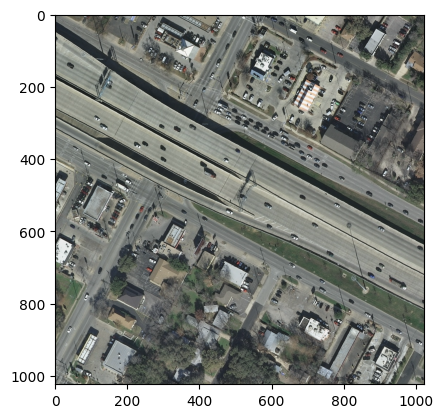

In [26]:
plt.imshow(images[0])

In [27]:
masks = []

for i in range(len(os.listdir(target_masks))):
    img_path = target_masks+"/"+os.listdir(target_masks)[i]
    img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
    masks.append(img)
masks

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [253, 255, 254, ...,   0,   0,   0],
        [255, 252, 255, ...,   0,   0,   0],
        [254, 255, 253, ...,   0,   0,   0]], dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   3,   0, ...,   0, 254, 255],
        [  0,   0,   2, ..., 255, 255, 253],
        [  1,   0,   0, ..., 255, 254, 255]], dtype=uint8),
 array([[  1,   0,   0, ..., 251, 255, 255],
        [  0,   1,   0, ..., 255, 255, 254],
        [  0,   0,   0, ..., 254, 255, 254],
        ...,
        [  0,   0,   0, ...,  

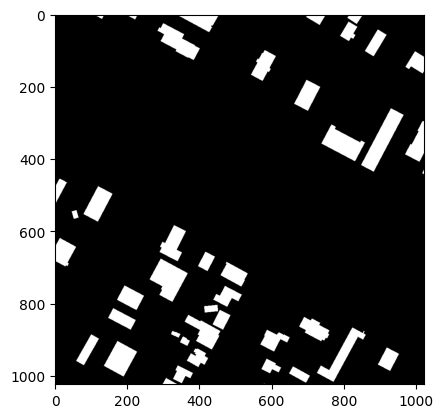

In [28]:
plt.imshow(masks[0], cmap="gray")

In [29]:
masks = np.array(masks)
masks.shape

(16, 1024, 1024)

In [30]:
images = np.array(images)
images.shape

(16, 1024, 1024, 3)

In [31]:
## valid images (images which has rooftop)
valid_indices = [i for i, masks in enumerate(masks) if masks.max()!=0]

filtered_images = images[valid_indices]
filtered_masks = masks[valid_indices]

In [32]:
filtered_masks.shape, filtered_images.shape

((16, 1024, 1024), (16, 1024, 1024, 3))

In [33]:
from datasets import Dataset
from PIL import Image

In [34]:

dataset_dict = {
    "image" : [Image.fromarray(img) for img in filtered_images],
    "label" : [Image.fromarray(m) for m in filtered_masks]
}


dataset = Dataset.from_dict(dataset_dict)
dataset

Dataset({
    features: ['image', 'label'],
    num_rows: 16
})

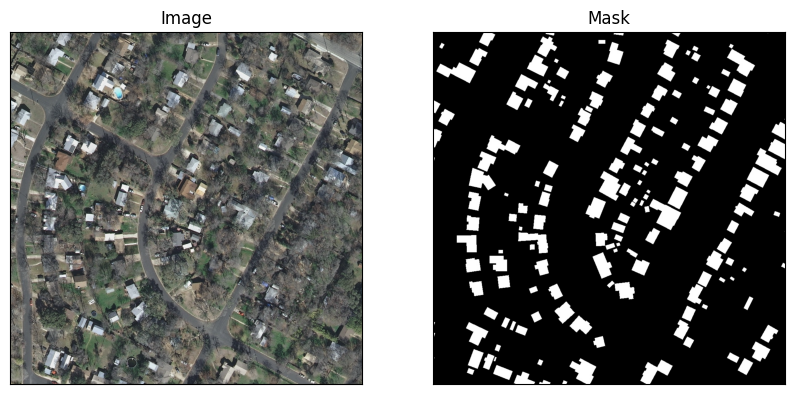

In [35]:
rand_num = random.randint(0, filtered_images.shape[0]-1)
example_images = dataset[rand_num]["image"]
example_mask = dataset[rand_num]["label"]

fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].imshow(np.array(example_images), cmap="gray")
ax[0].set_title("Image")

ax[1].imshow(example_mask, cmap="gray")
ax[1].set_title("Mask")

for a in ax:
    a.set_xticks([])
    a.set_yticks([])
    a.set_xticklabels([])
    a.set_yticklabels([])

plt.show()

In [36]:
from torch.utils.data import Dataset

In [38]:
def get_bounding_box(mask_image):
    # Ensure the mask is binary
    _, binary_mask = cv2.threshold(mask_image, 128, 255, cv2.THRESH_BINARY)
    
    ## to see the mask image after thresholding
    # cv2.imshow("mask_images_after_threshold",binary_mask)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # Find contours
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    print(f"total number of rooftops in the image is : {len(contours)}")

    # List to store bounding boxes
    bounding_boxes = []

    # Loop through contours and get bounding boxes
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        bounding_boxes.append((x, y, w, h))

    return bounding_boxes


In [39]:
class SAMDataset(Dataset):
  def __init__(self, dataset, processor):
    self.dataset = dataset
    self.processor = processor

  def __len__(self):
    return len(self.dataset)

  def __getitem__(self, idx):
    item = self.dataset[idx]
    image = item["image"]
    ground_truth_mask = np.array(item["label"])

    # get bounding box prompt
    prompt = get_bounding_box(ground_truth_mask)

    # prepare image and prompt for the model
    inputs = self.processor(image, input_boxes=[[prompt]], return_tensors="pt")

    # remove batch dimension which the processor adds by default
    inputs = {k:v.squeeze(0) for k,v in inputs.items()}

    # add ground truth segmentation
    inputs["ground_truth_mask"] = ground_truth_mask

    return inputs

In [40]:
# Initialize the processor
from transformers import SamProcessor
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

In [41]:
# Create an instance of the SAMDataset
train_dataset = SAMDataset(dataset=dataset, processor=processor)

In [42]:
example = train_dataset[0]
for k,v in example.items():
  print(k,v.shape)

total number of rooftops in the image is : 45
pixel_values torch.Size([3, 1024, 1024])
original_sizes torch.Size([2])
reshaped_input_sizes torch.Size([2])
input_boxes torch.Size([45, 4])
ground_truth_mask (1024, 1024)


/home/student/Documents/Arpit_sir/solar_vnv/lib/python3.10/site-packages/transformers/image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `SamImageProcessor.preprocess` and were ignored: 'point_pad_value'
  return self.preprocess(images, **kwargs)


In [49]:
# Create a DataLoader instance for the training dataset
from torch.utils.data import DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True, drop_last=False)

In [50]:
train_dataloader

In [51]:
batch = next(iter(train_dataloader))
# for k,v in batch.items():
#   print(k,v.shape)

total number of rooftops in the image is : 96
total number of rooftops in the image is : 179


RuntimeError: stack expects each tensor to be equal size, but got [96, 4] at entry 0 and [179, 4] at entry 1

In [46]:
batch["ground_truth_mask"].shape

NameError: name 'batch' is not defined

In [73]:
# Load the model
from transformers import SamModel
model = SamModel.from_pretrained("facebook/sam-vit-base")

# make sure we only compute gradients for mask decoder
for name, param in model.named_parameters():
  if name.startswith("vision_encoder") or name.startswith("prompt_encoder"):
    param.requires_grad_(False)

config.json:   0%|          | 0.00/6.57k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/375M [00:00<?, ?B/s]

In [74]:
from torch.optim import Adam
import monai

In [75]:
# Initialize the optimizer and the loss function
optimizer = Adam(model.mask_decoder.parameters(), lr=1e-5, weight_decay=0)
#Try DiceFocalLoss, FocalLoss, DiceCELoss
seg_loss = monai.losses.DiceCELoss(sigmoid=True, squared_pred=True, reduction='mean')

In [76]:
from tqdm import tqdm
from statistics import mean
import torch
from torch.nn.functional import threshold, normalize

In [78]:
#Training loop
num_epochs = 4

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

model.train()
for epoch in range(num_epochs):
    epoch_losses = []
    for batch in tqdm(train_dataloader):
      # forward pass
      outputs = model(pixel_values=batch["pixel_values"].to(device),
                      input_boxes=batch["input_boxes"].to(device),
                      multimask_output=False)

      # compute loss
      predicted_masks = outputs.pred_masks.squeeze(1)
      ground_truth_masks = batch["ground_truth_mask"].float().to(device)
      loss = seg_loss(predicted_masks, ground_truth_masks.unsqueeze(1))

      # backward pass (compute gradients of parameters w.r.t. loss)
      optimizer.zero_grad()
      loss.backward()

      # optimize
      optimizer.step()
      epoch_losses.append(loss.item())

    print(f'EPOCH: {epoch}')
    print(f'Mean loss: {mean(epoch_losses)}')

  0%|          | 0/168 [00:00<?, ?it/s]c:\Users\dhruv\Python_Envs\dl_env\lib\site-packages\transformers\image_processing_utils.py:41: UserWarning: The following named arguments are not valid for `SamImageProcessor.preprocess` and were ignored: 'point_pad_value'
  return self.preprocess(images, **kwargs)
100%|██████████| 168/168 [1:02:34<00:00, 22.35s/it]


EPOCH: 0
Mean loss: -33728.51818189167


100%|██████████| 168/168 [57:11<00:00, 20.43s/it] 


EPOCH: 1
Mean loss: -194475.87830171132


100%|██████████| 168/168 [1:00:15<00:00, 21.52s/it]


EPOCH: 2
Mean loss: -366305.63320196245


100%|██████████| 168/168 [55:41<00:00, 19.89s/it] 

EPOCH: 3
Mean loss: -562453.3714657738


In [77]:
# Save the model's state dictionary to a file

In [79]:
torch.save(model.state_dict(), "C:\\Users\\dhruv\\Documents\\DA-IICT\\Arpit_rana\\SAM_Model\\Codes\\Notebook\\Models\\model1_e_5.pth")


In [80]:
from transformers import SamModel, SamConfig, SamProcessor
import torch

# Inference

In [81]:
# Load the model configuration
model_config = SamConfig.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

# Create an instance of the model architecture with the loaded configuration
my_mito_model = SamModel(config=model_config)
#Update the model by loading the weights from saved file.
my_mito_model.load_state_dict(torch.load("C:\\Users\\dhruv\\Documents\\DA-IICT\\Arpit_rana\\SAM_Model\\Codes\\Notebook\\Models\\model1_e_5.pth"))

C:\Users\dhruv\AppData\Local\Temp\ipykernel_32048\50689652.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  my_mito_model.load_state_dict(torch.load("C:\\Users\\dhruv\\Do

<All keys matched successfully>

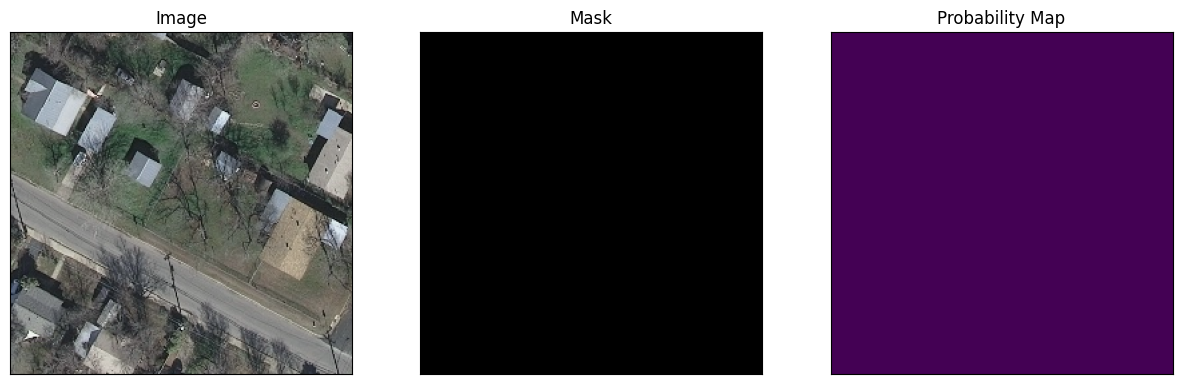

In [82]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt

# let's take a random training example
idx = random.randint(0, filtered_images.shape[0]-1)

# load image
test_image = dataset[idx]["image"]

# get box prompt based on ground truth segmentation map
ground_truth_mask = np.array(dataset[idx]["label"])
prompt = get_bounding_box(ground_truth_mask)

# prepare image + box prompt for the model
inputs = processor(test_image, input_boxes=[[prompt]], return_tensors="pt")

# Move the input tensor to the GPU if it's not already there
inputs = {k: v.to(device) for k, v in inputs.items()}

my_mito_model.eval()

# forward pass
with torch.no_grad():
    outputs = my_mito_model(**inputs, multimask_output=False)

# apply sigmoid
medsam_seg_prob = torch.sigmoid(outputs.pred_masks.squeeze(1))
# convert soft mask to hard mask
medsam_seg_prob = medsam_seg_prob.cpu().numpy().squeeze()
medsam_seg = (medsam_seg_prob > 0.5).astype(np.uint8)


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first image on the left
axes[0].imshow(np.array(test_image), cmap='gray')  # Assuming the first image is grayscale
axes[0].set_title("Image")

# Plot the second image on the right
axes[1].imshow(medsam_seg, cmap='gray')  # Assuming the second image is grayscale
axes[1].set_title("Mask")

# Plot the second image on the right
axes[2].imshow(medsam_seg_prob)  # Assuming the second image is grayscale
axes[2].set_title("Probability Map")

# Hide axis ticks and labels
for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# Display the images side by side
plt.show()
